In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from IPython.display import Image
from matplotlib import rcParams
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 26
rcParams['legend.fontsize']= 'x-large'
rcParams['axes.titlesize']= 'x-large'
rcParams['xtick.labelsize']= 'x-large'
rcParams['ytick.labelsize']= 'x-large'
rcParams['axes.labelsize']= 'x-large'
rcParams['figure.titlesize']= 'xx-large'
rcParams['legend.title_fontsize']= 'xx-large'
%matplotlib inline
#rcParams.keys()

# Motivación

Después de la discusión de los problemas de valor inicial de las EDO, esta vez introduciremos otro tipo de problemas: los problemas de valor límite.

El problema de valor límite en la EDO es una ecuación diferencial ordinaria junto con un conjunto de restricciones adicionales, es decir, las condiciones de contorno. Hay muchos problemas de valor límite en la ciencia y la ingeniería. Por lo tanto, los fundamentos de las ecuaciones diferenciales ordinarias con valores límite especificados son muy importantes. Discutiremos dos métodos para resolver problemas de valor límite, los métodos de disparo y los métodos de diferencias finitas. Al final, deberías entender qué son los problemas de valor límite de ecuaciones diferenciales ordinarias, cómo plantear estos problemas a Python y cómo resolverlos.

# Enunciado del problema de valor límite de la EDO

Anteriormente hemos hablado de los problemas de valor inicial de las ecuaciones diferenciales ordinarias. Podemos ver que en los problemas de valor inicial, todos los valores conocidos se especifican en el mismo valor de la variable independiente, por lo general en el límite inferior del intervalo, por lo que de ahí viene el término "inicial". En otro tipo de problemas - problemas de valor límite, como el nombre sugiere, los valores conocidos se especifican en los extremos de la variable independiente, por lo tanto, los límites del intervalo.

Por ejemplo, si tenemos una simple ecuación diferencial ordinaria de segundo orden
\begin{equation}
\frac{d^2f(x)}{dx^2}=\frac{df(x)}{dx}+3
\end{equation}

si la variable independiente está sobre el dominio de [0, 20], el problema de valor inicial tendrá las dos condiciones sobre el valor 0, es decir, conocemos el valor de $f(0)$
y $f'(0)$. En cambio, los problemas de valor límite especificarán los valores en $x=0$ y $x=20$. Obsérvese que al resolver una EDO de primer orden para obtener una solución particular, necesitamos una restricción, mientras que una EDO de enésimo orden, necesitamos $n$ restricciones.

El enunciado del problema de valor límite para una ecuación diferencial ordinaria de orden $n$

de orden ordinario se enuncia como
\begin{equation}
F\left(x,f(x),\frac{df(x)}{dx},\frac{d^2f(x)}{dx^2},\frac{d^3f(x)}{dx^3},...,\frac{d^{n-1}f(x)}{dx^{n-1}}\right)=\frac{d^nf(x)}{dx^n},
\end{equation}

Para resolver esta ecuación en un intervalo de $x \in [a,b]$ necesitamos $n$ condiciones de contorno conocidas en los valores $a$ y $b$. Para el caso de 2º orden, dado que podemos tener la condición de contorno tanto un valor de $f(x)$ como un valor de la derivada $f'(x)$ podemos tener varios casos diferentes para los valores especificados. Por ejemplo, podemos tener los valores de la condición de contorno especificados como:
- Dos valores de $f(x)$ están dados, es decir $f(a)$ y $f(b)$ son conocidos.
- Dos derivadas de $f'(x)$ se dan, es decir, $f'(a)$ y $f'(b)$ se conocen, o
- Se conocen las condiciones mixtas de los dos casos anteriores, es decir, se conocen $f(a)$ y $f'(b)$, o se conocen $f'(a)$ y $f(b)$.

En cualquier caso, para obtener la solución particular, necesitamos dos condiciones de contorno para obtener la solución. El problema de valor límite de la EDO de segundo orden también se llama problemas de valor límite de dos puntos. Los problemas de la EDO de orden superior necesitan condiciones de contorno adicionales, normalmente los valores de las derivadas superiores de las variables independientes. Vamos a centrarnos en los problemas de valor límite de dos puntos.

Veamos un ejemplo de problema de valor límite y veamos cómo podemos resolverlo en las próximas secciones.

# Ejemplo:

Las aletas se utilizan en muchas aplicaciones para aumentar la transferencia de calor de las superficies. Por lo general, el diseño de las aletas de espiga de refrigeración se encuentra en muchas aplicaciones, como la aleta de espiga utilizada como un disipador de calor para la refrigeración de un objeto. Podemos modelar la distribución de la temperatura en una aleta de espiga como se muestra en la figura, donde la longitud de la aleta es $L$, y el inicio y el final de la aleta es $x=0$ así como $x=L$. Las temperaturas en los dos extremos son $T_0$ y $T_L$. $T_s$ es la temperatura del entorno. Si consideramos tanto la convección como la radiación, la distribución de temperatura en estado estacionario de la aleta de la clavija $T(x)$ se puede modelar con la siguiente ecuación:
\begin{equation}
\frac{d^2T}{dx^2}−\alpha_1(T−Ts)−\alpha_2(T4−T4)=0
\begin{equation}

con las condiciones de contorno $T(0)=T_0$ y $T(L)=T_L,$ y $\alpha_1$ y $\alpha_2$ son los coeficientes. Esta es una EDO de segundo orden con dos condiciones de contorno, por lo tanto, podemos resolverla para obtener soluciones particulares.

<img width="40%" src="../figures/Pin-Fin-Heat.png">

# Los métodos de disparo

Los **métodos de disparo** se desarrollan con el objetivo de transformar los problemas de valor límite de la EDO en un problema de valor inicial equivalente, para luego poder resolverlo utilizando los métodos que hemos aprendido antes. En los problemas de valor inicial, podemos empezar en el valor inicial y avanzar para obtener la solución. Pero este método no funciona para los problemas de valor límite, porque no hay suficientes condiciones de valor inicial para resolver la EDO para obtener una solución única. Por lo tanto, los métodos de disparo se desarrollaron para superar esta dificultad.

<img width="50%" src="../figures/shooting.png">

El nombre del método de tiro se deriva de la analogía con el tiro al blanco: como se muestra en la figura anterior, disparamos al blanco y observamos dónde golpea el objetivo, basándonos en los errores, podemos ajustar nuestra puntería y disparar de nuevo con la esperanza de que golpee cerca del objetivo. Podemos ver en la analogía que el método de tiro es un método iterativo.

Veamos cómo funciona el método de tiro utilizando la EDO de segundo orden dada $f(a)=f_a$ y $f(b)=f_b$
\begin{equation}
F\left(x,f(x),\frac{df(x)}{dx}\right)=\frac{d^2f(x)}{dx^2}
\end{equation}

- Paso 1: Iniciamos todo el proceso adivinando $f'(a)=\alpha$, junto con $f(a)=f_a$, convertimos el problema anterior en un problema de valor inicial con dos condiciones todas sobre el valor $x=a$. Este es el paso del objetivo.
- Paso 2: Usando lo que aprendimos antes, es decir, podemos usar el método Runge-Kutta, para integrar a la otra frontera $b$ para encontrar $f(b)=f_{\beta}$. Este es el paso de rodaje.
- Paso 3: Ahora comparamos el valor de $f_{\beta}$ con $f_b$, normalmente nuestra conjetura inicial no es buena, y $f_{\beta}\neq f_b$, pero lo que queremos es $f_{\beta}-f_b=0$, por lo tanto, ajustamos nuestras conjeturas iniciales y repetimos. Hasta que el error sea aceptable, podemos parar. Este es el paso iterativo.

Podemos ver que las ideas detrás de los métodos de disparo es muy simple. Pero la comparación y la búsqueda de las mejores conjeturas no son fáciles, este procedimiento es muy tedioso. Pero esencialmente, encontrar la mejor conjetura para obtener $f_{\beta}-f_b=0$ es un problema de búsqueda de raíces, una vez que nos damos cuenta de esto, tenemos una forma sistemática de buscar la mejor conjetura. Como $f_{\beta}$ es una función de $\alpha$, por lo tanto, el problema se convierte en encontrar la raíz de $g(\alpha)-f_b=0$. Podemos utilizar cualquier método por ahora para resolverlo.

## ¡PRUEBA! 

Vamos a lanzar un cohete, y dejemos que $y(t)$ es la altura (metros desde la superficie) del cohete en el momento $t$. Sabemos que la gravedad $g$=9.8 m/s$^2$. Si queremos que el cohete esté a 50 m del suelo después de 5 segundos del lanzamiento, ¿cuál debe ser la velocidad en el momento del lanzamiento? (ignoramos el arrastre de la resistencia del aire).

Para responder a esta pregunta, podemos enmarcar el problema en un problema de valores de contorno para una EDO de segundo orden. La EDO es 
\begin{equation}
\frac{d^2y}{dt^2}=-g
\end{equation}

con las dos condiciones de contorno: $y(0)=0$ y $y(5)=50$. Y queremos responder a la pregunta, ¿cuál es el valor de $y'(0)$ en el lanzamiento?

Esta es una pregunta bastante sencilla, podemos resolverla analíticamente con facilidad, con la respuesta correcta $y'(0)=34.5$. Ahora vamos a resolverla utilizando el método de disparo. Primero, reduciremos el orden de la función, la EDO de segundo orden se convierte en 
\begin{equation}
\frac{dy}{dt}=v, \ \ \ \ \  \frac{dv}{dt}=-g
\end{equation}

Por lo tanto, tenemos 
\begin{equation}
S(t)=\begin{bmatrix} 
y(t)\\ 
v(t)
\end{bmatrix}=\begin{bmatrix} 
S_1\\ 
S_2
\end{bmatrix}
\end{equation}
y entonces
\begin{equation}
\frac{dS(t)}{dt}=\begin{bmatrix} 
0 & 1 \\ 
0 & -g/v
\end{bmatrix}S(t)
\end{equation}

La solución exacta es:
\begin{equation}
y(t)=-\frac{gt^2}{2}+\left(\frac{5g}{2}+10\right)t
\end{equation}

In [5]:
from scipy.integrate import solve_ivp

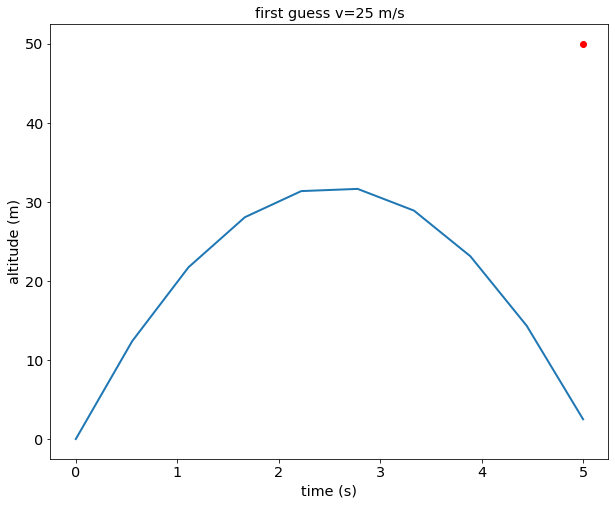

In [6]:
F = lambda t, s: np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)

t_span = np.linspace(0, 5, 100)
y0 = 0
v0 = 25
t_eval = np.linspace(0, 5, 10)
sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.show()

En la figura vemos que la primera suposición es un poco pequeña, ya que con esta velocidad a 5 s, la altitud del cohete es inferior a 10 m. El punto rojo de la figura es el objetivo que queremos alcanzar. Ahora vamos a ajustar nuestra suposición y aumentar la velocidad a 40 m/s.

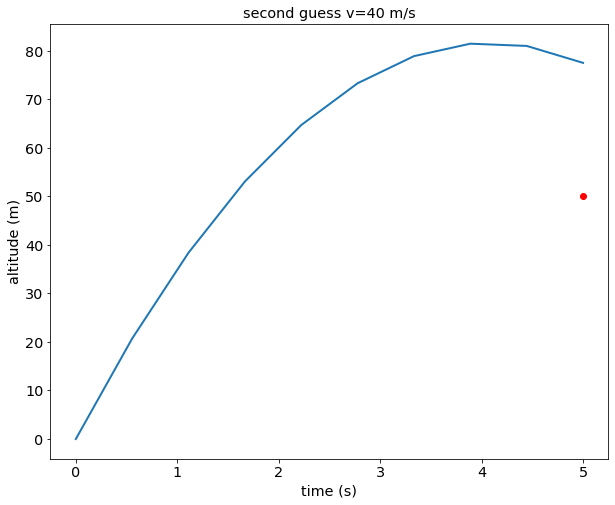

In [7]:
v0 = 40
sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'second guess v={v0} m/s')
plt.show()

In [5]:
sol.y[0]

array([ 0.        , 20.70987654, 38.39506173, 53.05555556, 64.69135802,
       73.30246914, 78.88888889, 81.45061728, 80.98765432, 77.5       ])

Podemos ver que esta vez sobrestimamos la velocidad. Por lo tanto, esta conjetura aleatoria no es fácil de encontrar el mejor resultado. Como mencionamos anteriormente, si tratamos este procedimiento como la búsqueda de la raíz, entonces tendremos una buena manera de buscar el mejor resultado. Vamos a utilizar fsolve de Python para encontrar la raíz. Podemos ver en el siguiente ejemplo, que encontramos la respuesta correcta directamente.

In [6]:
#exact at t=5
y_5=-9.8*5**2/2+(5*9.8/2+10)*5
for i in np.arange(25,40,0.5):
    sol = solve_ivp(F, [0, 5], [0, i], t_eval = t_eval)
    print("At v_0 =",i,"time t is",sol.t[-1],"solution y(t=5) is",sol.y[0][-1],"Error respect to exact solution is",sol.y[0][-1]-y_5)

At v_0 = 25.0 time t is 5.0 solution y(t=5) is 2.5000000000000977 Error respect to exact solution is -47.499999999999886
At v_0 = 25.5 time t is 5.0 solution y(t=5) is 5.000000000000105 Error respect to exact solution is -44.99999999999988
At v_0 = 26.0 time t is 5.0 solution y(t=5) is 7.5000000000000675 Error respect to exact solution is -42.499999999999915
At v_0 = 26.5 time t is 5.0 solution y(t=5) is 10.000000000000075 Error respect to exact solution is -39.999999999999915
At v_0 = 27.0 time t is 5.0 solution y(t=5) is 12.500000000000087 Error respect to exact solution is -37.4999999999999
At v_0 = 27.5 time t is 5.0 solution y(t=5) is 15.0000000000001 Error respect to exact solution is -34.999999999999886
At v_0 = 28.0 time t is 5.0 solution y(t=5) is 17.5000000000001 Error respect to exact solution is -32.499999999999886
At v_0 = 28.5 time t is 5.0 solution y(t=5) is 20.00000000000009 Error respect to exact solution is -29.999999999999897
At v_0 = 29.0 time t is 5.0 solution y(t=

In [9]:
from scipy.optimize import fsolve

def objective(v0):
    sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval)
    y = sol.y[0]
    return y[-1] - 50

v0, = fsolve(objective, 10)
print(r"Initial velocity must be v_0 =",v0)

Initial velocity must be v_0 = 34.49999999999999


C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


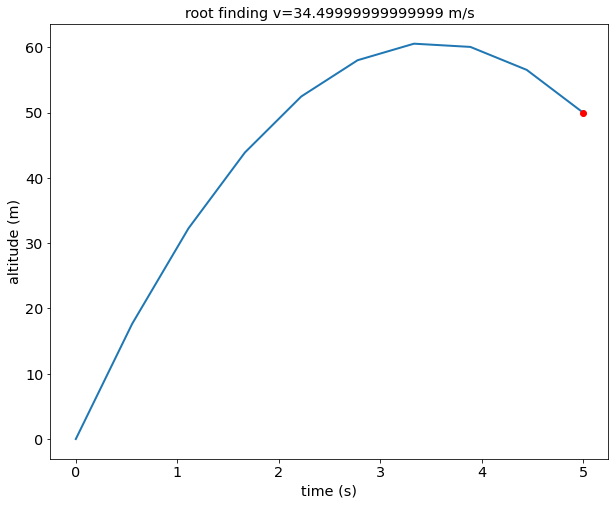

In [10]:
sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'root finding v={v0} m/s')
plt.show()

**¡PRUEBA!** Cambiemos la suposición inicial y veamos si eso cambia nuestro resultado.

In [11]:
for v0_guess in range(1, 100, 10):
    v0, = fsolve(objective, v0_guess)
    print('Init: %d, Result: %.1f' %(v0_guess, v0))

Init: 1, Result: 34.5
Init: 11, Result: 34.5
Init: 21, Result: 34.5
Init: 31, Result: 34.5
Init: 41, Result: 34.5
Init: 51, Result: 34.5
Init: 61, Result: 34.5
Init: 71, Result: 34.5
Init: 81, Result: 34.5
Init: 91, Result: 34.5


C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# Método de las diferencias finitas

Otra forma de resolver los problemas de valor límite de las EDO es el **método de las diferencias finitas**, en el que podemos utilizar fórmulas de diferencias finitas en puntos de malla uniformemente espaciados para aproximar las ecuaciones diferenciales. De esta manera, podemos transformar una ecuación diferencial en un sistema de ecuaciones algebraicas para resolver.

En el **método de las diferencias finitas**, las derivadas de la ecuación diferencial se aproximan utilizando las fórmulas de diferencias finitas. Podemos dividir el intervalo de $[a,b]$
en $n$ subintervalos iguales de longitud $h$ como se muestra en la siguiente figura.

<img width="40%" src="../figures/Finite-difference2.png">

Por lo general, se suelen utilizar las fórmulas de diferencias centrales en los métodos de diferencias finitas debido a que dan una mayor precisión. La ecuación diferencial se cumple sólo en los puntos de la malla, y las derivadas primera y segunda son
\begin{equation}
\frac{dy}{dx}=\frac{y_{i+1}-y_{i-1}}{2h}, \ \ \ \ \ \ \frac{d^2y}{dx^2}=\frac{y_{i−1}−2y_i+y_{i+1}}{h^2}
\end{equation}

Estas expresiones de diferencias finitas se utilizan para sustituir las derivadas de $y$ en la ecuación diferencial, lo que conduce a un sistema de $n+1$ ecuaciones algebraicas lineales si la ecuación diferencial es lineal. Si la ecuación diferencial es no lineal, las ecuaciones algebraicas también serán no lineales.

### EJEMPLO: 
Resuelva el problema del cohete de la sección anterior utilizando el método de las diferencias finitas, grafique la altitud del cohete después del lanzamiento. La EDO es
\begin{equation}
\frac{d^2y}{dt^2}=-g
\end{equation}

con las condiciones de contorno $y(0)=0$ y $y(5)=50$. Tomemos $n=10$.

Como el intervalo de tiempo es $[0,5]$ y tenemos $n=10$, por tanto, $h=0.5$, utilizando las derivadas aproximadas por diferencias finitas, tenemos
\begin{equation}
y_0=0, \ \ \ \ y_{i−1}−2y_i+y_{i+1}=−gh^2, \ \ \ \ \ i=1,2,...,n−1, \ \ \ \ \ y_{10}=50
\end{equation}


si utilizamos la notación matricial, tendremos
\begin{equation}
\begin{bmatrix} 
1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\ 
1 & -2 & 1 & 0 & \cdots & 0 & 0 & 0 & 0 \\ 
0 & 1 & -2 & 1 & \cdots & 0 & 0 & 0 & 0 \\ 
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots \\ 
0 & 0 & 0 & 0 & \cdots & 1 & -2 & 1 & 0 \\ 
0 & 0 & 0 & 0 & \cdots & 0 & 1 & -2 & 1 \\ 
0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 1 \\ 
\end{bmatrix}\begin{bmatrix} 
y_0 \\ 
y_1 \\ 
y_2 \\ 
\vdots \\ 
y_{n-2} \\ 
y_{n-1} \\ 
y_{n} \\ 
\end{bmatrix}=\begin{bmatrix} 
0 \\ 
-gh^2 \\ 
-gh^2 \\ 
\vdots \\ 
-gh^2 \\ 
-gh^2 \\ 
50 \\ 
\end{bmatrix}
\end{equation}

Por lo tanto, tenemos 11 ecuaciones en el sistema, podemos resolverlo. ¿¿¿Cómo???

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[ 0.   -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 50.  ]


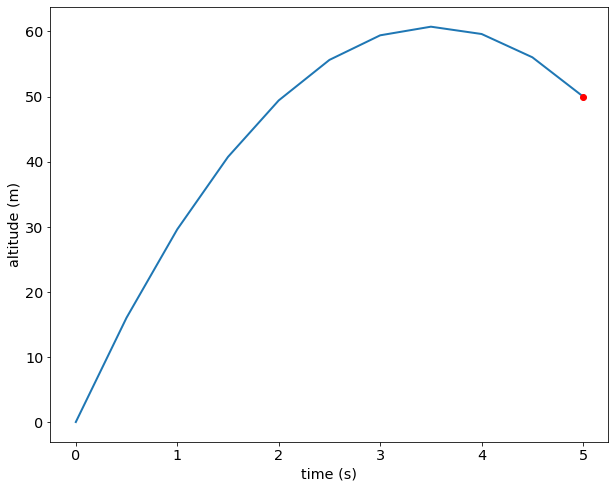

In [13]:
n = 10
h = (5-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(n+1)
b[1:-1] = -9.8*h**2
b[-1] = 50
print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

t = np.linspace(0, 5, 11)

plt.figure(figsize=(10,8))
plt.plot(t, y)
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()

Ahora, resolvamos $y'(0)$, a partir de la fórmula de diferencias finitas, sabemos que $dy/dx=(y_{i+1}-y_{i-1})/(2h)$, lo que significa que $y'(0)=(y_1-y_{-1})(2h)$, pero no sabemos qué es $y_{-1}$. En realidad, podemos calcular $y_{-1}$ ya que conocemos los valores de $y$ en cada punto de la cuadrícula. A partir de la fórmula de diferencias finitas de la segunda derivada, sabemos que $(y_{-1}-2y_0+y_1)/(h^2)=-g$, por lo tanto, podemos resolver para $y_{-1}$ y luego obtener la velocidad de lanzamiento. Ver el cálculo de abajo.

In [14]:
y_n1 = -9.8*h**2 + 2*y[0] - y[1]
(y[1] - y_n1) / (2*h)

34.5

Podemos ver que obtenemos la velocidad de lanzamiento correcta utilizando el método de las diferencias finitas. Para que te sientas más cómodo con el método, veamos otro ejemplo.

**PRUEBA**
Utilizar el método de las diferencias finitas para resolver el siguiente problema lineal de valor límite
\begin{equation}
y''=-4y+4x
\end{equation}
con las condiciones de contorno como $y(0)=0$ y $y'(\pi/2)=0$. La solución exacta del problema es $y=x-\sin 2x$, grafica los errores contra los $n$ puntos de la malla ($n$ de 3 a 100) para el punto de frontera $y(\pi/2)$.

Utilizando las derivadas aproximadas por diferencias finitas, tenemos
\begin{equation}
y0=0, \ \ \ \ \ \ y_{i−1}−2y_i+y_{i+1}−h^2(−4y_i+4x_i)=0, \ \ \ \ \ \ i=1,2,...,n−1, \ \ \ \ \ 2y_{n−1}−2y_n−h^2(−4y_n+4x_n)=0
\end{equation}

La última ecuación se deriva del hecho de que $\frac{y_{n+1}-y_{n-1}}{2h}=0$ (la condición de contorno $y'(\pi/2)=0)$. Por tanto, $y_{n+1}=y_{n-1}$.

Si utilizamos la notación matricial, tendremos
\begin{equation}
\begin{bmatrix} 
1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\ 
1 & -2+4h^2 & 1 & 0 & \cdots & 0 & 0 & 0 & 0 \\ 
0 & 1 & -2+4h^2 & 1 & \cdots & 0 & 0 & 0 & 0 \\ 
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots \\ 
0 & 0 & 0 & 0 & \cdots & 1 & -2+4h^2 & 1 & 0 \\ 
0 & 0 & 0 & 0 & \cdots & 0 & 1 & -2+4h^2 & 1 \\ 
0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 1 \\ 
\end{bmatrix}\begin{bmatrix} 
y_0 \\ 
y_1 \\ 
y_2 \\ 
\vdots \\ 
y_{n-2} \\ 
y_{n-1} \\ 
y_{n} \\ 
\end{bmatrix}
=\begin{bmatrix} 
0 \\ 
4h^2x_1 \\ 
4h^2x_2 \\ 
\vdots \\ 
4h^2x_{n-2} \\ 
4h^2x_{n-1} \\ 
4h^2x_{n} \\ 
\end{bmatrix}
\end{equation}

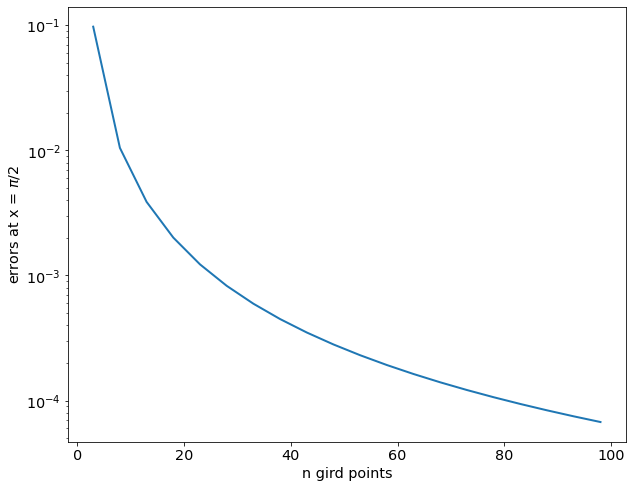

In [15]:
def get_a_b(n):
    h = (np.pi/2-0) / n
    x = np.linspace(0, np.pi/2, n+1)
    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = -2+4*h**2
    A[n, n-1] = 2
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2+4*h**2
        A[i, i+1] = 1

    # Get b
    b = np.zeros(n+1)
    for i in range(1, n+1):
        b[i] = 4*h**2*x[i]
    
    return x, A, b

x = np.pi/2
v = x - np.sin(2*x)

n_s = []
errors = []

for n in range(3, 100, 5):
    x, A, b = get_a_b(n)
    y = np.linalg.solve(A, b)
    n_s.append(n)
    e = v - y[-1]
    errors.append(e)
    
plt.figure(figsize = (10,8))
plt.plot(n_s, errors)
plt.yscale('log')
plt.xlabel('n gird points')
plt.ylabel('errors at x = $\pi/2$')
plt.show()

Podemos ver que con puntos de malla más densos, nos acercamos a la solución exacta en el punto límite.

El método de las diferencias finitas también puede aplicarse a las EDO de orden superior, pero necesita la aproximación de las derivadas de orden superior mediante la fórmula de las diferencias finitas. Por ejemplo, si estamos resolviendo una EDO de cuarto orden, tendremos que utilizar lo siguiente
\begin{equation}
\frac{d^4y}{dx^4}=\frac{y_{i−2}−4y_{i−1}+6y_{i}−4y_{i+1}+y_{i+2}}{h^4}
\end{equation}

No hablaremos más de las EDOs de orden superior, ya que la idea que hay detrás para resolverla es similar a la EDO de segundo orden que hemos discutido anteriormente.

Recodá: https://web.media.mit.edu/~crtaylor/calculator.html

# Error numérico e inestabilidad (BVP)

Los problemas de valores límite también tienen los dos problemas principales de los que hablamos en el capítulo anterior, el error numérico - precisión y la estabilidad. Dependiendo de los diferentes métodos utilizados, ya sea el método de disparo o el de diferencias finitas, son diferentes.

Para el método de disparo, el error numérico es similar al que describimos para los problemas de valor inicial, ya que el método de disparo es esencialmente transformar el problema de valor límite en una serie de problemas de valor inicial. En cuanto a la estabilidad del método, podemos ver en el ejemplo inicial que incluso nuestras conjeturas iniciales no se acercan a la respuesta verdadera, el método devuelve una solución numérica precisa. Esto se debe a que la adición de la restricción de la derecha impide que los errores aumenten de forma ilimitada.

En el caso de los métodos de diferencias finitas, el error numérico viene determinado por el orden de precisión del esquema numérico utilizado. La precisión de los diferentes esquemas utilizados para las aproximaciones de las derivadas se discute en el notebook de diferenciación por elementos finitos. La precisión del método de diferencias finitas está determinada por el mayor de los dos errores de truncamiento, el esquema de diferencias utilizado para la ecuación diferencial o el del esquema de diferencias utilizado para discretizar las condiciones de contorno (vemos que el tamaño del paso tiene un fuerte efecto en la precisión del método de diferencias finitas). Dado que los métodos de diferencias finitas convierten esencialmente el BVP en la resolución de un sistema de ecuaciones, la estabilidad del mismo depende, por tanto, de la estabilidad del esquema utilizado para resolver simultáneamente el sistema de ecuaciones resultante.

# Python ODE Solvers (BVP)

En scipy, también hay un solucionador básico para resolver los problemas de valor límite, que es la función `scipy.integrate.solve_bvp`. La función resuelve un sistema de primer orden de EDOs sujeto a condiciones de contorno de dos puntos. La construcción de la función se muestra a continuación:

**CONSTRUCCIÓN:**

Sea $F$ una función objeto de la función que calcula

\begin{equation}
\frac{dS(t)}{dt}=F(t,S(t))
\end{equation}
con $S(t_0)=S_0$ y $t$ es una variable independiente unidimensional (tiempo), $S(t)$ es una función vectorial-valorada $n$-dimensional (estado), y la $F(t,S(t))$ define las ecuaciones diferenciales. $S_0$ es un valor inicial de $S$. La función $F$ debe tener la forma $dS=F(t,S)$, aunque el nombre no tiene que ser $F$. El objetivo es encontrar el $S(t)$ que satisface aproximadamente las ecuaciones diferenciales, dado el valor inicial $S(t_0)=S_0$.

La forma en que utilizamos el solucionador para resolver la ecuación diferencial es: 

`solve_ivp(fun,t_span,s0,method=′RK45′,t_eval=None)`

donde 
- `fun` toma la función en el lado derecho del sistema. 
- `t_span` es el intervalo de integración $(t_0,t_f)$, donde $t_0$ es el inicio y $t_f$ es el final del intervalo. 
- `s0` es el estado inicial. 
- Hay un par de métodos que podemos elegir, el predeterminado es 'RK45', que es el método Runge-Kutta explícito de orden 5(4). Hay otros métodos que se pueden usar también.
- `t_eval` toma los tiempos en los que se almacena la solución calculada, y debe estar ordenado y estar dentro de `t_span`.

Probemos un ejemplo a continuación.

Aplicaciones con problemas de contorno: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html

# Ejemplo: Aplicaciones!
## Vamos a resolver el ejemplo de la motivación inicial de este notebook

<img width="40%" src="../figures/Pin-Fin-Heat.png">

Las aletas se utilizan en muchas aplicaciones para aumentar la transferencia de calor de las superficies. Por lo general, el diseño de las aletas de refrigeración se encuentra en muchas aplicaciones, como la aleta de espiga utilizada como un disipador de calor para la refrigeración de un objeto. Podemos modelar la distribución de la temperatura en una aleta de espiga como se muestra en la siguiente figura, donde la longitud de la aleta es $L$, y el inicio y el final de la aleta es $x=0$ así como $x=L$. Las temperaturas en los dos extremos son $T_0$ y $T_L$. $T_s$ es la temperatura del entorno. Si consideramos tanto la convección como la radiación, la distribución de temperatura en estado estacionario de la aleta de la clavija $T(x)$ entre $x=0$ y $x=L$ puede modelarse con la siguiente ecuación
\begin{equation}
\frac{d^2T}{dx^2}−\alpha_1(T−T_s)−\alpha_2(T^4−T_s^4)=0
\end{equation}
con las condiciones de contorno $T(0)=T_0$ y $T(L)=T_L$, y $\alpha_1$ y $\alpha_2$ son coeficientes. Y se definen como $\alpha_1=\frac{h_cP}{kA_c}$ y $\alpha_2=\frac{\epsilon\sigma_{SB}P}{kA_c}$, donde 
- $h_c$ es el coeficiente de transferencia de calor por convección, 
- $P$ es el perímetro que delimita la sección transversal de la aleta, 
- $\epsilon$ es la emisividad radiativa de la superficie de la aleta, 
- $k$ es la conductividad térmica del material de la aleta, 
- $A_c$ es el área de la sección transversal de la aleta, y 
- $\sigma_{SB}=5,67\times 10^{-8}$ W/(m$^2$K$^2$) es la constante de Stefan-Boltzmann.

1. Determina la distribución de la temperatura si $L=0.2$ m, $T(0)=475$ K, $T(0.1)=290$ K, y $T_s=290$ K. 
2. Utilice los siguientes valores para los parámetros $h_c=40$ W/m$^2$/K, $P=0.015$ m, $\epsilon=0.4$, $k=240$ W/m/K, y $A_c=1,55\times 10^{-5}$ m$^2$.

Mi solución usando Maple:
<img width="70%" src="../figures/Screenshot from 2021-10-12 08-09-45.png">

In [19]:
from scipy.integrate import solve_bvp
hc,P,epsilon,k,Ac,sigma=40,0.015,0.4,240,1.55E-5,5.67E-8
alpha1,alpha2=hc*P/k/Ac,epsilon*sigma*P/k/Ac
Ts=290
def fun(x, y):
    return np.vstack((y[1], alpha1*(y[0]-Ts)+alpha2*(y[0]**4-Ts**4)))

def bc(ya, yb):
    return np.array([ya[0]-475, yb[0]-290])

x = np.linspace(0., 0.1, 101)

y_a = np.zeros((2, x.size))
y_b = np.zeros((2, x.size))
y_a[-1]= 290
y_a[0]=475
#y_b[-1]= 290
#y_b[0]=475


sol = solve_bvp(fun, bc, x, y_a)

In [20]:
alpha1, alpha2

(161.29032258064515, 9.145161290322581e-08)

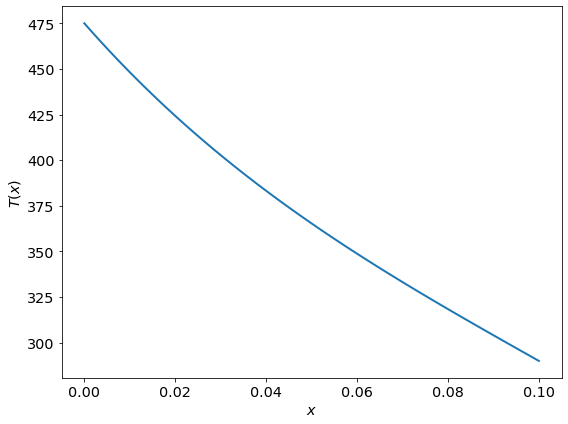

In [21]:
plt.figure(figsize = (8, 6))
x_plot=np.linspace(0, .1, 100)
y_plot_a = sol.sol(x_plot)[0]
plt.plot(x_plot, y_plot_a, label='y_a')
plt.xlabel('$x$')
plt.ylabel('$T(x)$')
plt.tight_layout()
plt.show()


Tratando de resolver para más casos...

In [16]:
def sol_for_plot(hc=40,P=0.015,epsilon=0.4,k=240,Ac=1.55E-5):
    sigma=5.67E-8
    alpha1,alpha2=hc*P/k/Ac,epsilon*sigma*P/k/Ac
    Ts=290
    def fun(x, y):
        return np.vstack((y[1], alpha1*(y[0]-Ts)+alpha2*(y[0]**4-Ts**4)))

    def bc(ya, yb):
        return np.array([ya[0]-475, yb[0]-290])

    x = np.linspace(0., 0.1, 101)

    y_a = np.zeros((2, x.size))
    y_b = np.zeros((2, x.size))
    y_a[-1]= 290
    y_a[0]=475
    #y_b[-1]= 290
    #y_b[0]=475


    sol = solve_bvp(fun, bc, x, y_a)
    return sol

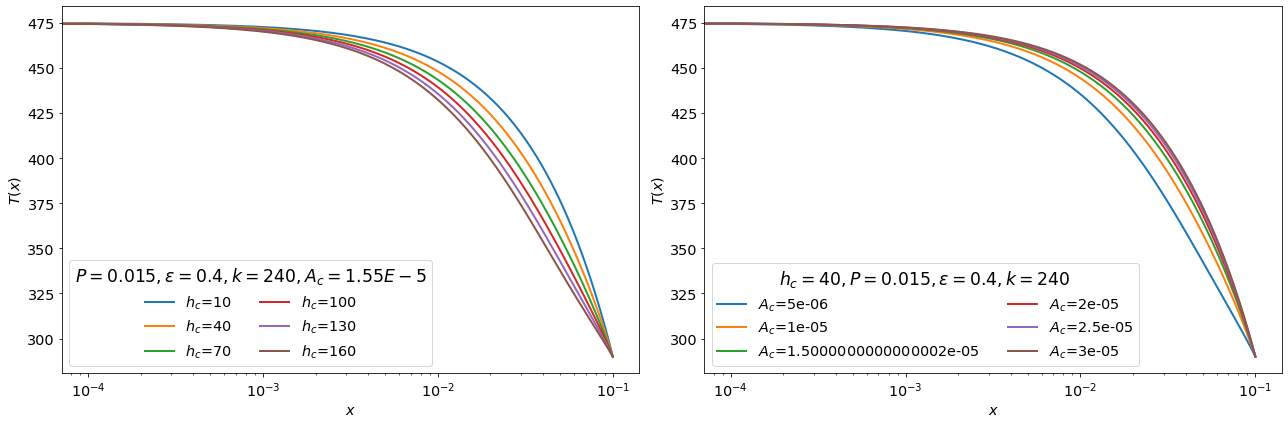

In [17]:
plt.figure(figsize = (18, 6))
plt.subplot(121)
for i in np.arange(10,180,30):
    sol=sol_for_plot(hc=i,P=0.015,epsilon=0.4,k=240,Ac=1.55E-5)
    x_plot=np.linspace(0, .1, 1000)
    y_plot_a = sol.sol(x_plot)[0]
    plt.plot(x_plot, y_plot_a, label=r'$h_c$={}'.format(i))
    plt.xlabel('$x$')
    plt.ylabel('$T(x)$')
    plt.xscale("log")
    plt.legend(title=r"$P=0.015,\epsilon=0.4,k=240,A_c=1.55E-5$",ncol=2)
plt.subplot(122)
for i in np.arange(.5E-5,3.5E-5,.5E-5):
    sol=sol_for_plot(hc=40,P=0.015,epsilon=0.4,k=240,Ac=i)
    x_plot=np.linspace(0, .1, 1000)
    y_plot_a = sol.sol(x_plot)[0]
    plt.plot(x_plot, y_plot_a, label=r'$A_c$={}'.format(i))
    plt.xlabel('$x$')
    plt.ylabel('$T(x)$')
    plt.xscale("log")
    plt.legend(title=r"$h_c=40,P=0.015,\epsilon=0.4,k=240$",ncol=2)

plt.tight_layout()
plt.show()

# Ejemplo: Aplicaciones! (Modelo de propagación del sarampión)
Este ejemplo es tomado de: 

"Kierzenka, J., & Shampine, L. F. (2001). A BVP solver based on residual control and the Maltab PSE. ACM Transactions on Mathematical Software (TOMS), 27(3), 299-316."

<img width="40%" src="../figures/measles_spread_model.png"> <img width="25%" src="../figures/measles_spread_model2.png">

In [18]:
zmu = 0.02
l = 0.0279
eta = 0.01
def fun_measles(x, y):
    beta = 1575 * (1 + np.cos(2 * np.pi * x))
    return np.vstack((
        mu - beta * y[0] * y[2],
        beta * y[0] * y[2] - y[1] / l,
        y[1] / l - y[2] / eta
    ))

def bc_measles(ya, yb):
    return ya - yb

x_measles = np.linspace(0, 1, 5)
y_measles = np.full((3, x_measles.shape[0]), 0.01)

In [19]:
res_measles = solve_bvp(fun_measles, bc_measles, x_measles, y_measles, verbose=2)

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.21e-02       5.42e-19           5              4       
       2          1.93e-02       7.05e-19           9              4       
       3          2.67e-02       4.09e-18          13              7       
       4          2.58e-02       1.39e-17          20             12       
       5          3.30e-02       1.39e-17          32             25       
       6          1.93e-04       0.00e+00          57              0       
Solved in 6 iterations, number of nodes 57. 
Maximum relative residual: 1.93e-04 
Maximum boundary residual: 0.00e+00


In [20]:
x_measles_plot = np.linspace(0, 1, 100)
y_measles_plot = res_measles.sol(x_measles_plot)

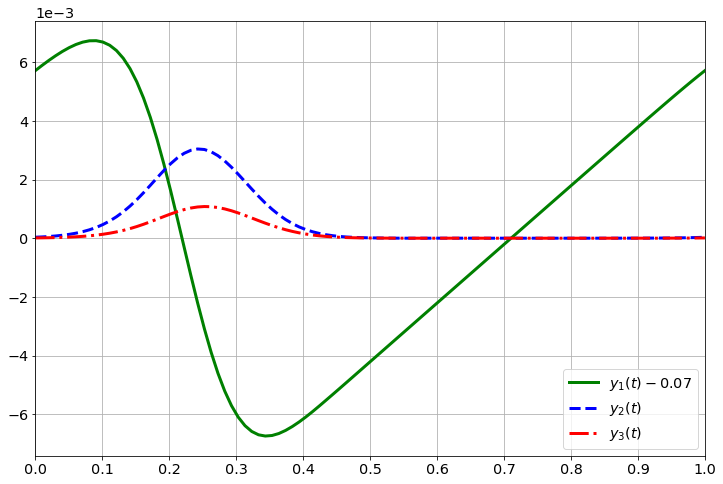

In [21]:
plt.figure(figsize = (12, 8))
plt.plot(x_measles_plot, y_measles_plot[0] - 0.065, 'g-', lw=3, label='$y_1(t) - 0.07$')
plt.plot(x_measles_plot, y_measles_plot[1], 'b--', lw=3, label='$y_2(t)$')
plt.plot(x_measles_plot, y_measles_plot[2], 'r-.', lw=3, label='$y_3(t)$')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Ejemplo: Aplicaciones! (Flujo en un canal vertical)
Este ejemplo es tomado de: 

"Kierzenka, J., & Shampine, L. F. (2001). A BVP solver based on residual control and the Maltab PSE. ACM Transactions on Mathematical Software (TOMS), 27(3), 299-316."

<img width="35%" src="../figures/vertical_channel1.png"> <img width="35%" src="../figures/vertical_channel2.png"> <img width="20%" src="../figures/vertical_channel3.png">

Miremos que este sistema podemos escribirlo matricialmente como sigue.
- Tomando la primera ecuación tenemos que
\begin{equation}
f'''-R\left[(f')^2-ff''\right]+RA=0
\end{equation}
por tanto, si hacemos $y_0=f$, $y_1=f'$ y $y_2=f''$, luego $y_0'=f'=y_1$, $y_1'=f''=y_2$, $y_2'=f'''=y_1''=y_0'''=R\left[y_1^2-y_0y_2\right]-RA$.

Por ahora tenemos un vector
\begin{equation}
Y=\begin{bmatrix}
y_0 \\
y_1 \\
y_2
\end{bmatrix}\rightarrow 
Y'=\begin{bmatrix}
y_0' \\
y_1' \\
y_2'
\end{bmatrix}=
\begin{bmatrix}
y_1 \\
y_2 \\
R\left[y_1^2-y_0y_2\right]-RA
\end{bmatrix}
\end{equation}

- Tomando la segunda ecuación tenemos que
\begin{equation}
h''-Rfh'+1=0
\end{equation}
por tanto, si hacemos $y_3=h$, $y_4=h'$, luego $y_3'=h'=y_4$, $y_4'=h''=y_3''=-Ry_0y_4-1$.
Extendemos entonces nuestro vector 
\begin{equation}
Y'\rightarrow Y'=\begin{bmatrix}
y_0' \\
y_1' \\
y_2' \\
y_3' \\
y_4'
\end{bmatrix}=
\begin{bmatrix}
y_1 \\
y_2 \\
R\left[y_1^2-y_0y_2\right]-RA \\
y_4 \\
-Ry_0y_4-1
\end{bmatrix}
\end{equation}

- Finalmente, tomando la tercera ecuación tenemos que
\begin{equation}
\theta''-Pf\theta'=0
\end{equation}
por tanto, si hacemos $y_5=\theta$, $y_6=\theta'$, luego $y_5'=\theta'=y_6$, $y_6'=\theta''=y_5''=-Py_0y_6$.
Extendemos nuevamente entonces nuestro vector 
\begin{equation}
Y'\rightarrow Y'=\begin{bmatrix}
y_0' \\
y_1' \\
y_2' \\
y_3' \\
y_4' \\
y_5' \\
y_6'
\end{bmatrix}=
\begin{bmatrix}
y_1 \\
y_2 \\
R\left[y_1^2-y_0y_2\right]-RA \\
y_4 \\
-Ry_0y_4-1 \\
y_6 \\
-Py_0y_6
\end{bmatrix}
\end{equation}

Este es el vector que vamos a incluir en nuestra función, a continuación...

In [22]:
def fun_flow(x, y, p):
    A = p[0]
    return np.vstack((
        y[1], y[2], 100 * (y[1]**2 - y[0]*y[2] - A),
        y[4], -100 * y[0] * y[4] - 1, y[6], -70 * y[0] * y[6]
    ))

def bc_flow(ya, yb, p):
    A = p[0]
    return np.array([ya[0], ya[1], yb[0] - 1, yb[1], ya[3], yb[3], ya[5], yb[5] - 1])

x_flow = np.linspace(0, 1, 10)
y_flow = np.ones((7, x_flow.shape[0]))

In [23]:
res_flow = solve_bvp(fun_flow, bc_flow, x_flow, y_flow, p=[1], verbose=2)

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.30e+00       5.27e-16          10             18       
       2          2.42e-02       5.29e-23          28             12       
       3          3.47e-03       5.29e-23          40              2       
       4          7.51e-04       3.42e-22          42              0       
Solved in 4 iterations, number of nodes 42. 
Maximum relative residual: 7.51e-04 
Maximum boundary residual: 3.42e-22


In [24]:
print("Found A={:.4f} --- matches with the value from the paper.".format(res_flow.p[0]))

Found A=2.7606 --- matches with the value from the paper.


In [25]:
x_flow_plot = np.linspace(0, 1, 100)
y_flow_plot = res_flow.sol(x_flow_plot)

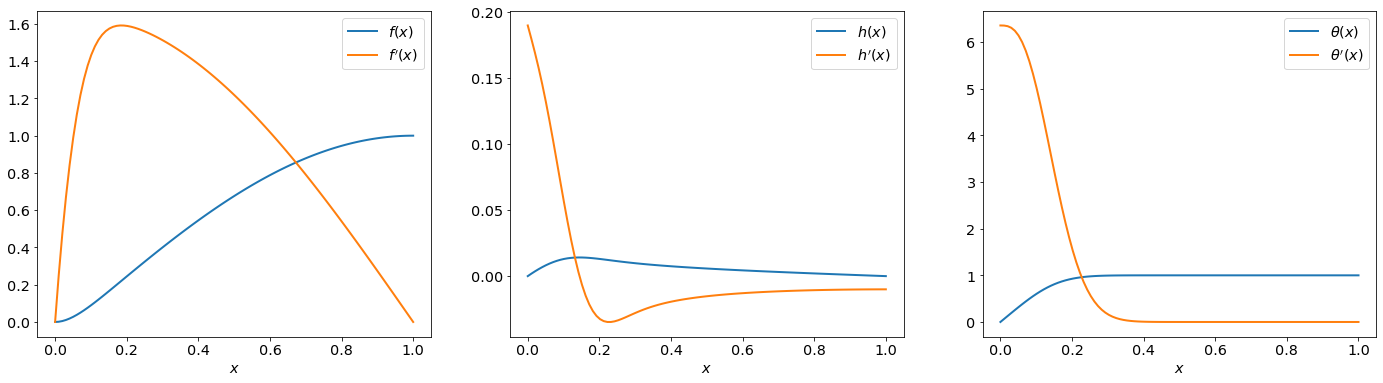

In [26]:
plt.figure(figsize = (24, 6))
plt.subplot(131)
plt.plot(x_flow_plot, y_flow_plot[0],label="$f(x)$")
plt.plot(x_flow_plot, y_flow_plot[1],label="$f'(x)$")
plt.xlabel("$x$")
plt.legend()
plt.subplot(132)
plt.plot(x_flow_plot, y_flow_plot[3],label="$h(x)$")
plt.plot(x_flow_plot, y_flow_plot[4],label="$h'(x)$")
plt.xlabel("$x$")
plt.legend()
plt.subplot(133)
plt.plot(x_flow_plot, y_flow_plot[5],label=r"$\theta(x)$")
plt.plot(x_flow_plot, y_flow_plot[6],label=r"$\theta'(x)$")
plt.xlabel("$x$")
plt.legend()

plt.show()

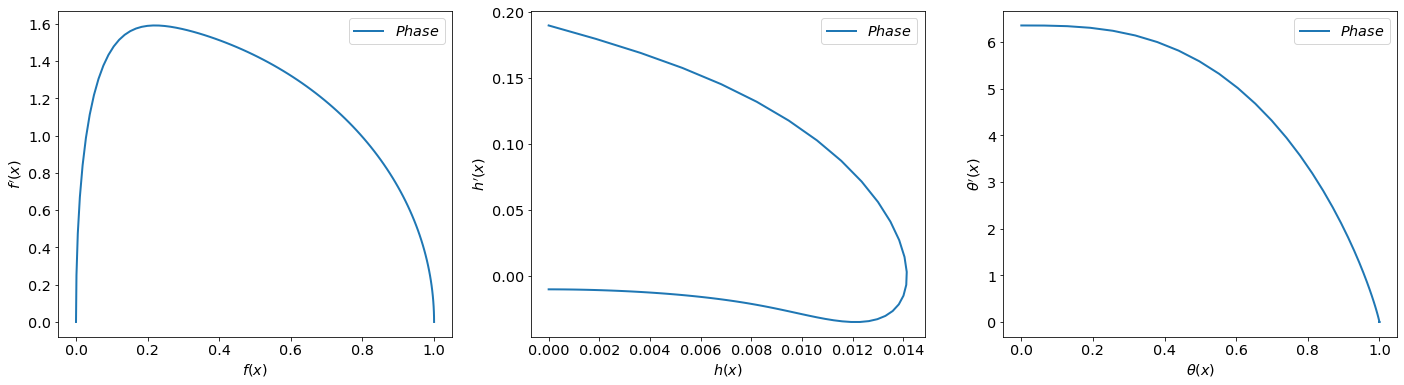

In [28]:
plt.figure(figsize = (24, 6))
plt.subplot(131)
plt.plot(y_flow_plot[0],y_flow_plot[1],label="$Phase$")
plt.xlabel("$f(x)$")
plt.ylabel("$f'(x)$")
plt.legend()
plt.subplot(132)
plt.plot(y_flow_plot[3], y_flow_plot[4],label="$Phase$")
plt.xlabel("$h(x)$")
plt.ylabel("$h'(x)$")
plt.legend()
plt.subplot(133)
plt.plot(y_flow_plot[5],y_flow_plot[6],label=r"$Phase$")
plt.xlabel(r"$\theta(x)$")
plt.ylabel(r"$\theta'(x)$")
plt.legend()

plt.show()

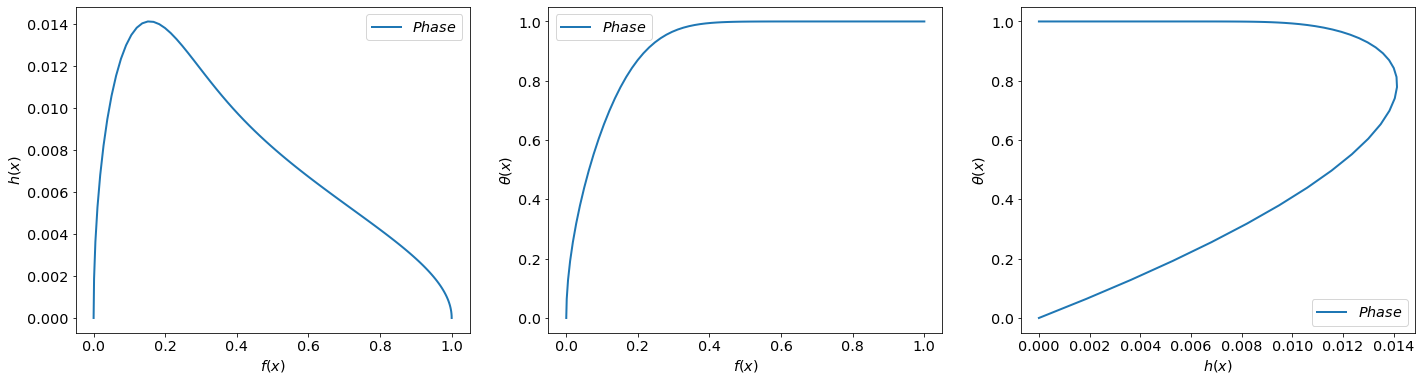

In [31]:
plt.figure(figsize = (24, 6))
plt.subplot(131)
plt.plot(y_flow_plot[0],y_flow_plot[3],label="$Phase$")
plt.xlabel("$f(x)$")
plt.ylabel("$h(x)$")
plt.legend()
plt.subplot(132)
plt.plot(y_flow_plot[0], y_flow_plot[5],label="$Phase$")
plt.xlabel("$f(x)$")
plt.ylabel(r"$\theta(x)$")
plt.legend()
plt.subplot(133)
plt.plot(y_flow_plot[3],y_flow_plot[5],label=r"$Phase$")
plt.xlabel(r"$h(x)$")
plt.ylabel(r"$\theta(x)$")
plt.legend()

plt.show()